<a href="https://colab.research.google.com/github/maryam-haseeb/CodSoft/blob/main/TASK_5_Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
%matplotlib inline

**Loading Dataset**

In [2]:
df=pd.read_csv ('/content/creditcard.csv')

**Some Basic Information**

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [5]:
df.shape

(9965, 31)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9965 entries, 0 to 9964
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    9965 non-null   int64  
 1   V1      9965 non-null   float64
 2   V2      9965 non-null   float64
 3   V3      9964 non-null   float64
 4   V4      9964 non-null   float64
 5   V5      9964 non-null   float64
 6   V6      9964 non-null   float64
 7   V7      9964 non-null   float64
 8   V8      9964 non-null   float64
 9   V9      9964 non-null   float64
 10  V10     9964 non-null   float64
 11  V11     9964 non-null   float64
 12  V12     9964 non-null   float64
 13  V13     9964 non-null   float64
 14  V14     9964 non-null   float64
 15  V15     9964 non-null   float64
 16  V16     9964 non-null   float64
 17  V17     9964 non-null   float64
 18  V18     9964 non-null   float64
 19  V19     9964 non-null   float64
 20  V20     9964 non-null   float64
 21  V21     9964 non-null   float64
 22  

**Statistical Representation**

In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,9965.000000,9965.000000,9965.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,...,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000
mean,5934.484897,-0.241681,0.280693,0.906359,0.260247,-0.046342,0.132335,-0.071847,-0.065317,0.801220,...,-0.052099,-0.152091,-0.033426,0.021638,0.087302,0.108328,0.005614,0.003051,62.968359,0.003814
std,4449.407112,1.522695,1.308882,1.156948,1.440500,1.183634,1.307586,1.077872,1.260140,1.156424,...,0.914735,0.631310,0.488203,0.593818,0.428128,0.562661,0.411434,0.266532,184.626707,0.061641
min,0.000000,-27.670569,-34.607649,-15.496222,-4.657545,-32.092129,-23.496714,-26.548144,-23.632502,-6.329801,...,-11.468435,-8.527145,-15.144340,-2.512377,-2.577363,-1.338556,-7.976100,-3.509250,0.000000,0.000000
25%,2061.000000,-1.012157,-0.208591,0.412198,-0.615591,-0.643060,-0.630075,-0.542336,-0.190495,0.069439,...,-0.268191,-0.548412,-0.174222,-0.327438,-0.157704,-0.328193,-0.084489,-0.015751,5.000000,0.000000
50%,4547.000000,-0.372624,0.286179,0.943149,0.218492,-0.153090,-0.153577,-0.054658,0.012466,0.804930,...,-0.123101,-0.136078,-0.046009,0.079935,0.121180,0.043395,-0.004505,0.015904,15.950000,0.000000
75%,10163.000000,1.151506,0.900823,1.601871,1.119367,0.371762,0.503376,0.476280,0.273016,1.506066,...,0.032707,0.247913,0.081288,0.410877,0.359418,0.478249,0.121045,0.077418,50.792500,0.000000
max,14864.000000,1.960497,8.636214,4.101716,10.463020,34.099309,21.393069,34.303177,5.060381,10.392889,...,22.588989,4.534454,13.876221,3.200201,5.525093,3.517346,8.254376,4.860769,7712.430000,1.000000


In [8]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        1
V4        1
V5        1
V6        1
V7        1
V8        1
V9        1
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

**Data Visualization**

<Axes: ylabel='count'>

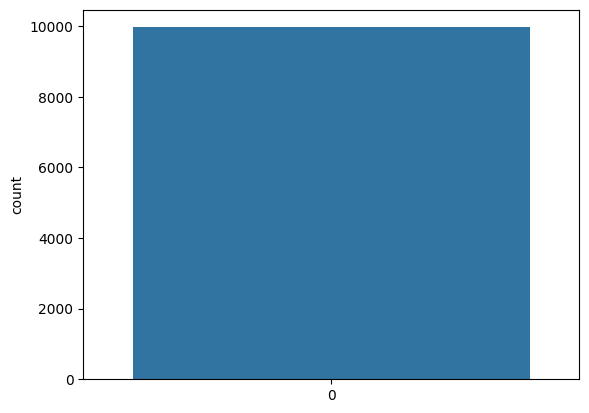

In [9]:
sns.countplot(df['Class'])

In [10]:
dft=df.drop(columns=['Time', 'Amount', 'Class'], axis=1)

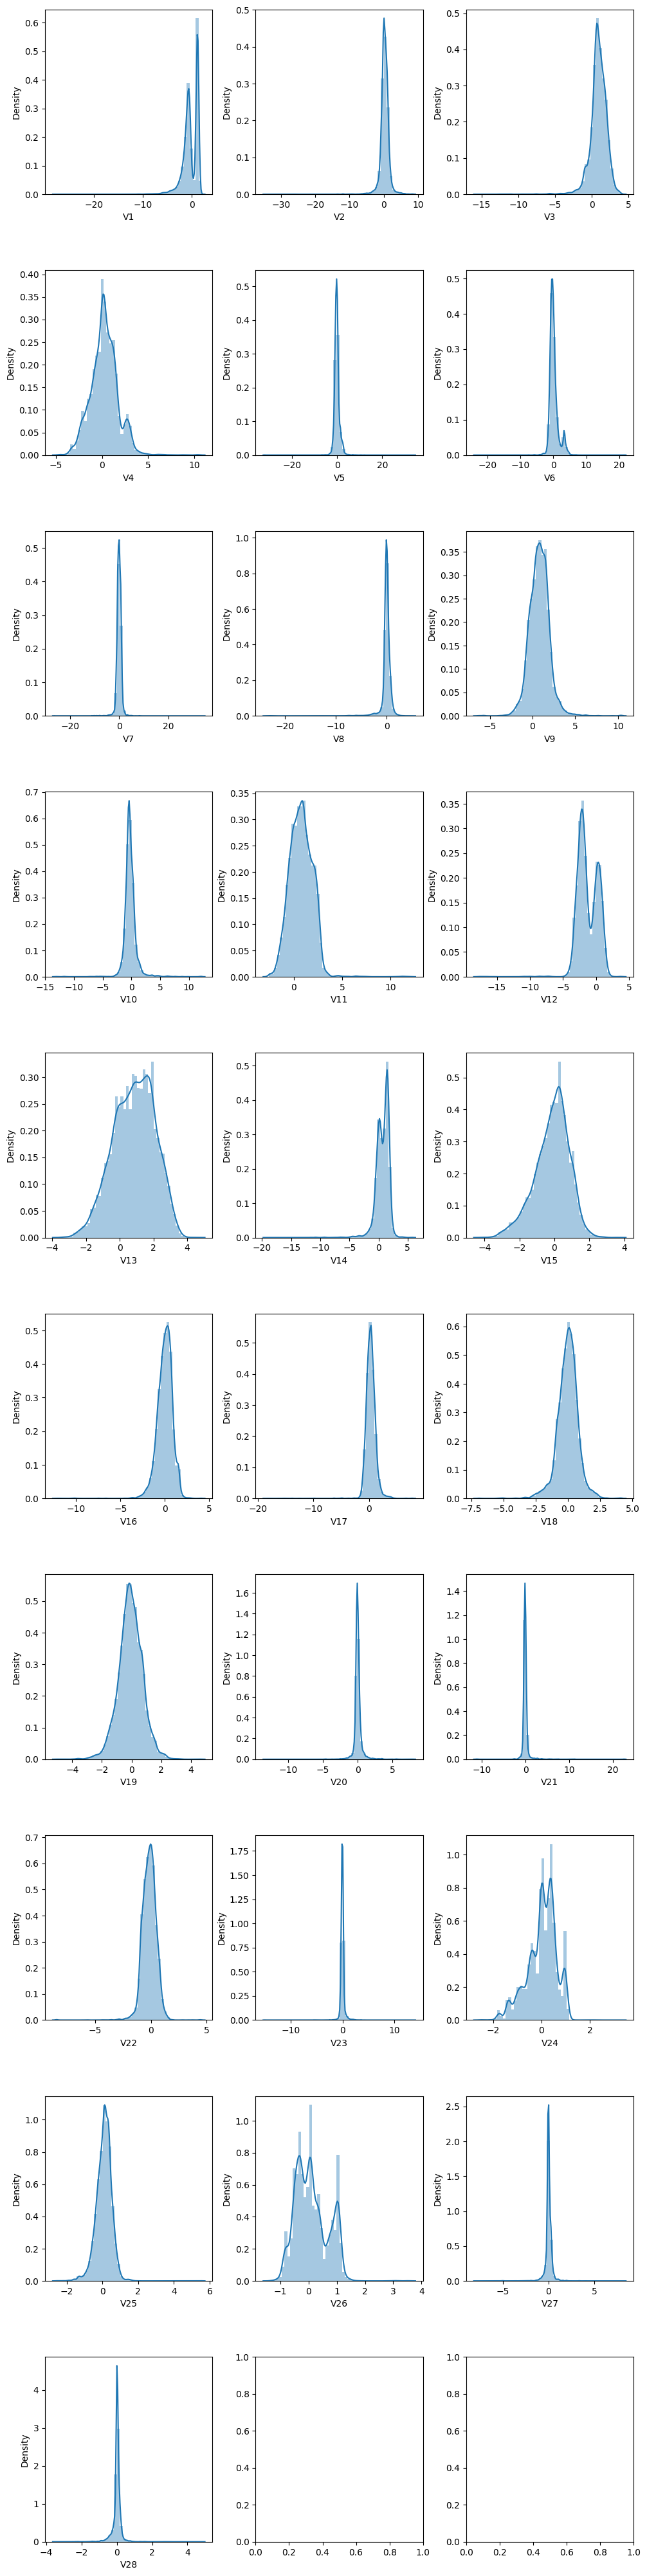

In [17]:
from re import I
fig, ax= plt.subplots(ncols=3, nrows=10, figsize=(10, 40))
index=0
ax=ax.flatten()
for col in dft.columns:
  sns.distplot(dft[col], ax=ax[index])
  index +=1
  plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=5)

<Axes: xlabel='Time', ylabel='Count'>

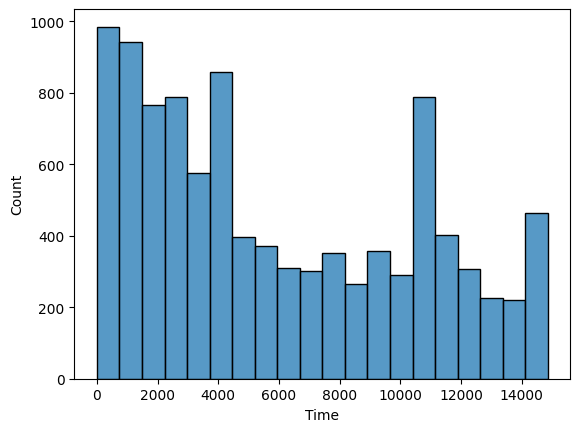

In [18]:
sns.histplot(df['Time'])

<Axes: xlabel='Amount', ylabel='Count'>

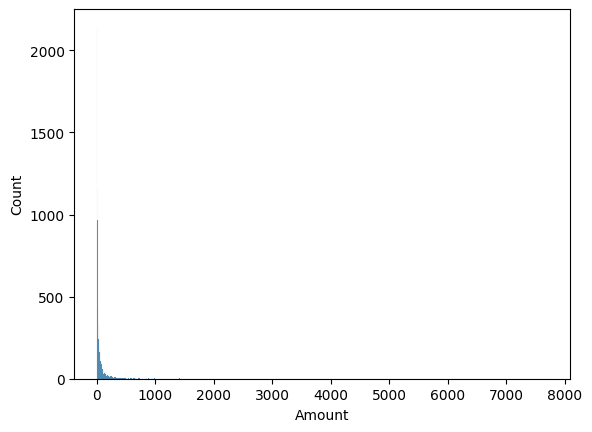

In [19]:
sns.histplot(df['Amount'])

<Axes: >

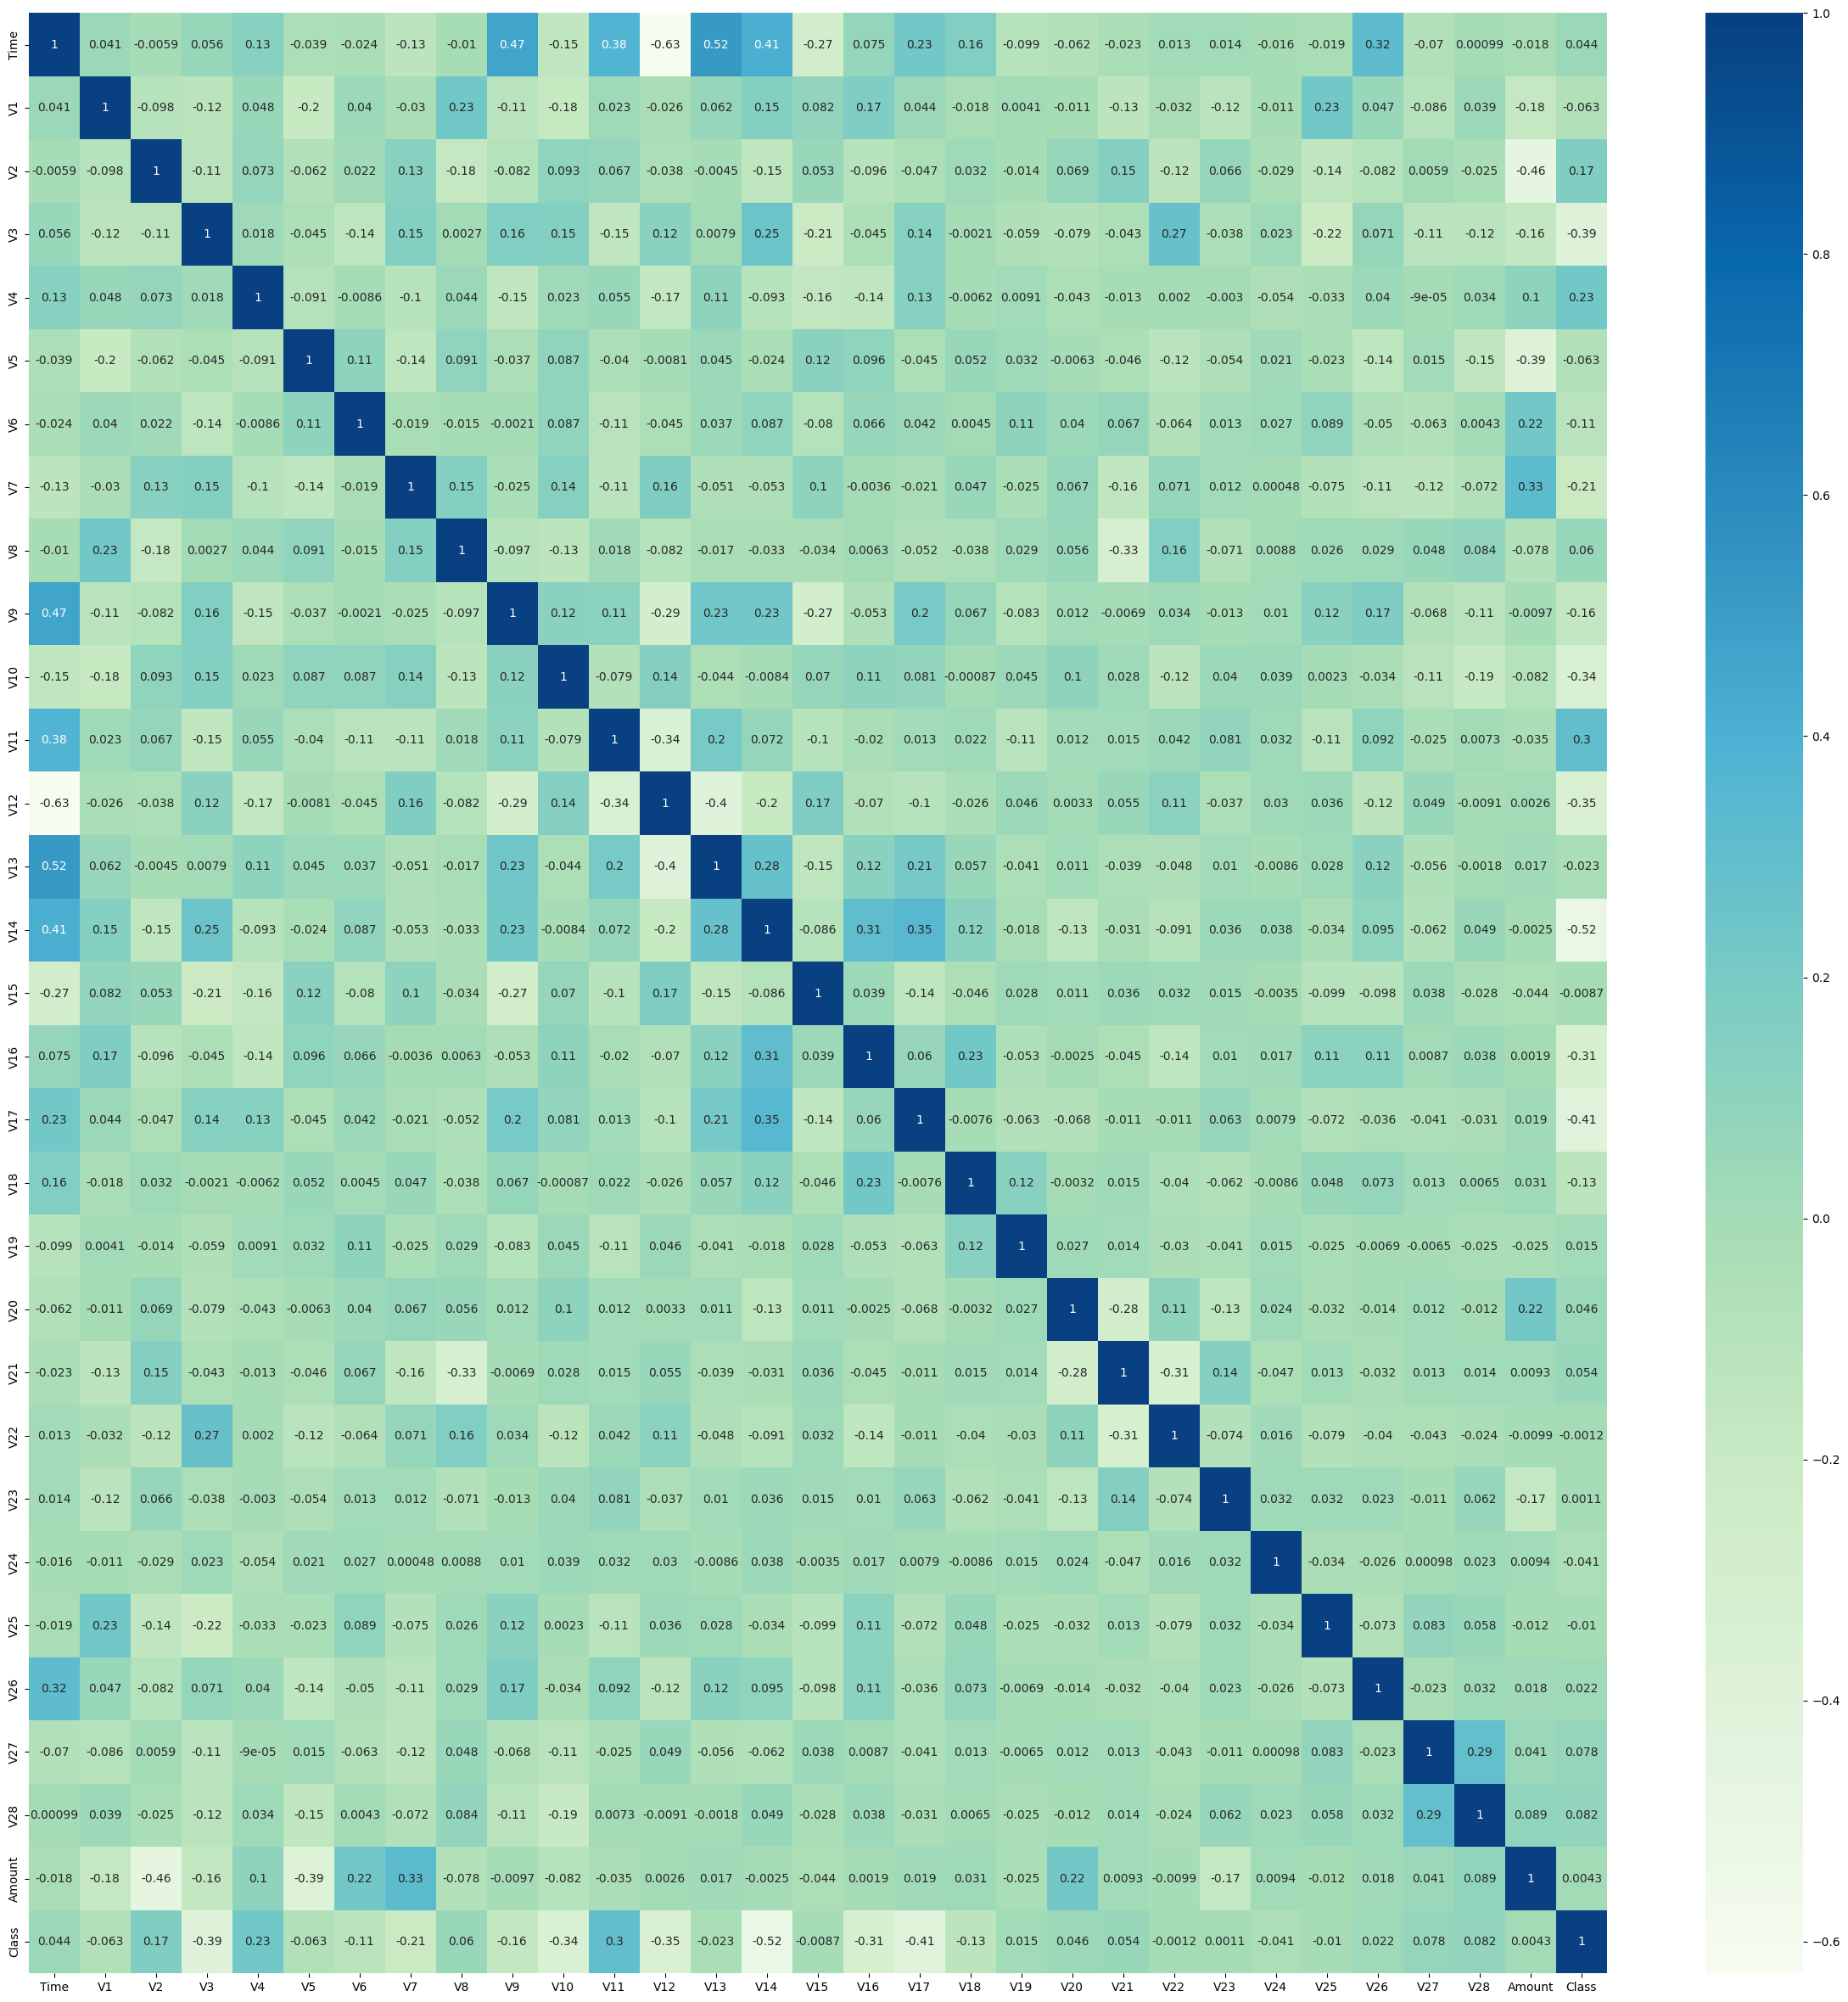

In [27]:
corrmatrix=df.corr()
plt.figure(figsize=(30,30))
sns.heatmap(corrmatrix, annot= True, cmap='GnBu')

**Handling NaN Values**

In [28]:
X=df.drop(columns=['Class'], axis=1)
y=df['Class']

In [33]:
scale=StandardScaler()
sc=scale.fit_transform(X)
sc

array([[-1.33383674, -0.73434396, -0.2700716 , ...,  0.31098673,
        -0.09044152,  0.46935782],
       [-1.33383674,  0.94149556, -0.01111089, ..., -0.03548098,
         0.04379751, -0.32650414],
       [-1.33361198, -0.73338963, -1.23841401, ..., -0.14818924,
        -0.23564249,  1.70997733],
       ...,
       [ 2.00542738,  0.9742678 ,  0.10612182, ..., -0.13781306,
         0.0531161 , -0.33408739],
       [ 2.00632642,  1.01567264, -0.25486974, ..., -0.2563498 ,
        -0.06924471, -0.31550843],
       [ 2.0070007 , -0.9892546 ,  2.62202713, ...,         nan,
                nan,         nan]])

In [36]:
is_nan = pd.isna(y)
print(is_nan)

0       False
1       False
2       False
3       False
4       False
        ...  
9960    False
9961    False
9962    False
9963    False
9964     True
Name: Class, Length: 9965, dtype: bool


In [37]:
X = X[~is_nan]
y = y[~is_nan]

In [39]:
from sklearn.impute import SimpleImputer

# Assuming 'y' is a Pandas Series
y = y.values.reshape(-1, 1)  # Convert to NumPy array and reshape

# Create the imputer
imputer = SimpleImputer(strategy='mean')
y = imputer.fit_transform(y)

**Training Model**

In [40]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)


In [42]:
model=LogisticRegression()

In [43]:
model.fit(X_train, y_train)

LogisticRegression()

In [46]:
outpre=model.predict(X_test)
print(classification_report(y_test, outpre))
print("F1 Score:", f1_score(y_test, outpre))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2482
         1.0       0.82      1.00      0.90         9

    accuracy                           1.00      2491
   macro avg       0.91      1.00      0.95      2491
weighted avg       1.00      1.00      1.00      2491

F1 Score: 0.9


In [48]:
model= RandomForestClassifier()

In [50]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [51]:
outpre=model.predict(X_test)
print(classification_report(y_test, outpre))
print("F1 Score:", f1_score(y_test, outpre))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2482
         1.0       1.00      0.89      0.94         9

    accuracy                           1.00      2491
   macro avg       1.00      0.94      0.97      2491
weighted avg       1.00      1.00      1.00      2491

F1 Score: 0.9411764705882353


In [53]:
model=XGBClassifier(n_jobs=-1)

In [54]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [55]:
outpre=model.predict(X_test)
print(classification_report(y_test, outpre))
print("F1 Score:", f1_score(y_test, outpre))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2482
         1.0       0.89      0.89      0.89         9

    accuracy                           1.00      2491
   macro avg       0.94      0.94      0.94      2491
weighted avg       1.00      1.00      1.00      2491

F1 Score: 0.8888888888888888


**Class Imbalancement**

<Axes: ylabel='Density'>

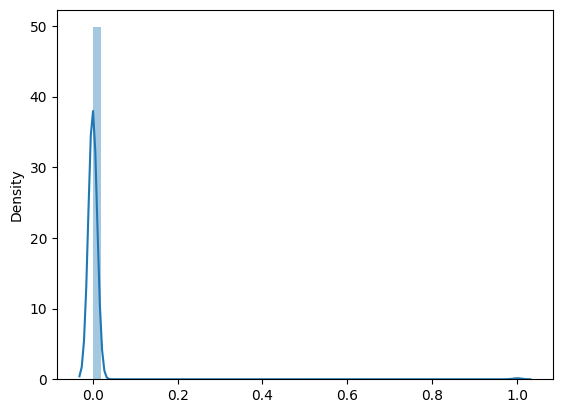

In [56]:
sns.distplot(y_train)

In [60]:
over_sample=SMOTE()

In [62]:
x_smote, y_smote= over_sample.fit_resample(X_train, y_train)

<Axes: ylabel='count'>

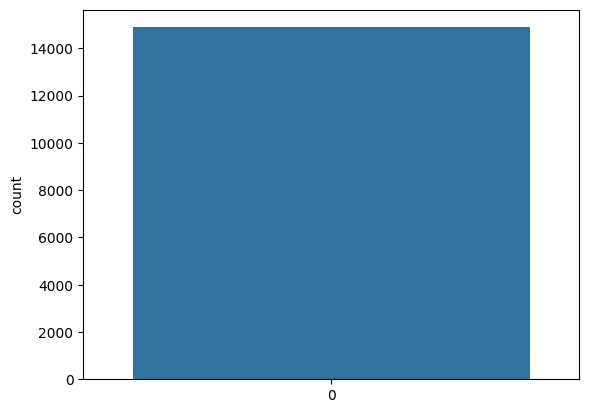

In [63]:
sns.countplot(y_smote)

<Axes: ylabel='Count'>

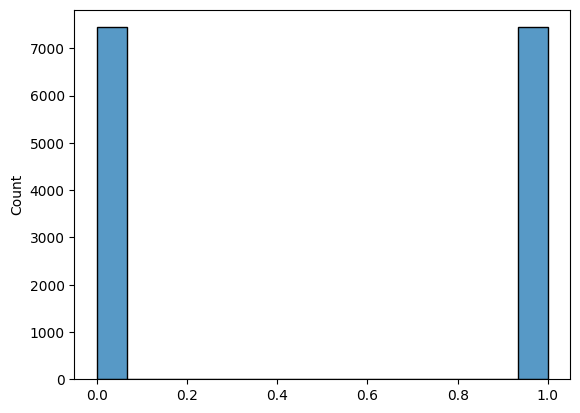

In [64]:
sns.histplot(y_smote)

In [65]:
model=LogisticRegression()

In [66]:
model.fit(x_smote, y_smote)

LogisticRegression()

In [69]:
outpred=model.predict(X_test)
print(classification_report(y_test, outpred))
print("F1 Score:", f1_score(y_test, outpred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2482
         1.0       0.69      1.00      0.82         9

    accuracy                           1.00      2491
   macro avg       0.85      1.00      0.91      2491
weighted avg       1.00      1.00      1.00      2491

F1 Score: 0.8181818181818181


In [70]:
model=RandomForestClassifier(n_jobs=-1)

In [71]:
model.fit(x_smote, y_smote)

RandomForestClassifier(n_jobs=-1)

In [72]:
outpred=model.predict(X_test)
print(classification_report(y_test, outpred))
print("F1 Score:", f1_score(y_test, outpred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2482
         1.0       1.00      0.89      0.94         9

    accuracy                           1.00      2491
   macro avg       1.00      0.94      0.97      2491
weighted avg       1.00      1.00      1.00      2491

F1 Score: 0.9411764705882353


In [73]:
model=XGBClassifier(n_jobs=-1)

In [74]:
model.fit(x_smote, y_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [75]:
outpred=model.predict(X_test)
print(classification_report(y_test, outpred))
print("F1 Score:", f1_score(y_test, outpred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2482
         1.0       0.89      0.89      0.89         9

    accuracy                           1.00      2491
   macro avg       0.94      0.94      0.94      2491
weighted avg       1.00      1.00      1.00      2491

F1 Score: 0.8888888888888888
